In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
x1 = datetime.datetime.now()
print(x1)

2021-03-28 09:48:23.364066


In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.target.shape

(70000,)

In [6]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [7]:
print(train_img.shape)
print(test_img.shape)
print(train_lbl.shape)
print(test_lbl.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [8]:
scaler = StandardScaler()
# fit on training set only
scaler.fit(train_img)

StandardScaler()

In [9]:
# Apply transform to both the training set and test set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

### PCA to speed up machine learning algorithms

In [10]:
# MAke an instance of the model
pca = PCA(.95)

In [11]:
# Fit PCA on trainging set. Note: you are fitting PCA on training set only
pca.fit(train_img)

PCA(n_components=0.95)

In [12]:
pca.n_components_

327

In [13]:
# Apply the mapping (transform) to both the training set and test set
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

#### Step 1: Import the model you want to use
#### In sklearn, all machine learning models are implemented as Python classes

In [14]:
clf = svm.SVC(gamma=0.001, C=100) # Các tham số cho mô hình hoạt động tốt hơn

#### Step 2: Training the model on the data, storing the information learned from the data
#### Model is learning the relationship between x(digits) and y(labels)

In [15]:
clf.fit(train_img, train_lbl)

SVC(C=100, gamma=0.001)

In [16]:
y_pred = clf.predict(test_img)
y_pred

array(['0', '4', '1', ..., '1', '3', '0'], dtype=object)

##### Measuring Model Performmance
##### Basiccally, how the model performs on new data (test set)

In [17]:
print("Accuracy is", metrics.accuracy_score(test_lbl, y_pred)*100, "%")

Accuracy is 97.38 %


In [18]:
score = clf.score(test_img, test_lbl)
print(score)

0.9738


In [19]:
new = clf.predict(test_img[0].reshape(1, -1))
new

array(['0'], dtype=object)

In [20]:
x2 = datetime.datetime.now()
print(x2)

2021-03-28 09:51:25.617819


In [21]:
d = x2 - x1
print(d)

0:03:02.253753


Text(0, 0.5, 'Cumulative explained variance')

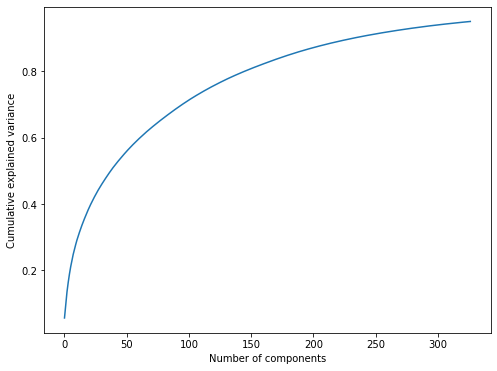

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")